In [92]:
# Imports
import os
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [93]:
# Set random seeds (for reproducibility requirement)
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

In [94]:
# Load data
df_test = pd.read_csv('/kaggle/input/ift6758-a20/test.csv')
df_train = pd.read_csv('/kaggle/input/ift6758-a20/train.csv')
df_train.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,...,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,...,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,...,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,...,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,...,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,...,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


In [95]:
print("Number of training examples: ", df_train.shape[0])
df_train.isnull().sum()

Number of training examples:  7500


Id                                                0
User Name                                         0
Personal URL                                   4244
Profile Cover Image Status                       90
Profile Verification Status                       0
Profile Text Color                               66
Profile Page Color                               78
Profile Theme Color                              72
Is Profile View Size Customized?                  0
UTC Offset                                      486
Location                                       1461
Location Public Visibility                        0
User Language                                     0
Profile Creation Timestamp                        0
User Time Zone                                  486
Num of Followers                                  0
Num of People Following                           0
Num of Status Updates                             0
Num of Direct Messages                            0
Profile Cate

In [96]:
df_train['Location'].head(10)

0                             NaN
1                          mumbai
2    NYC + 70 Countries Worldwide
3                Indianapolis, In
4      777 Beach Blvd. Biloxi, MS
5                             NaN
6                 Bronx, New York
7                          Brasil
8                          LONDON
9                             NaN
Name: Location, dtype: object

In [97]:
print("We drop columns with a lot of NaN values.")
print("We also drop columns ID and UserName as they are all unique.")
print("Finally, we drope the Profile Image as we won't use it for now.")
df_train = df_train.drop(['Id' ,'User Name','Personal URL','UTC Offset','Location','User Time Zone', 'Profile Image'], axis=1)
df_train.head(2)

We drop columns with a lot of NaN values.
We also drop columns ID and UserName as they are all unique.
Finally, we drope the Profile Image as we won't use it for now.


,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,Location Public Visibility,User Language,Profile Creation Timestamp,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes
0,Set,Verified,db1a2c,eaf0f2,e70409,False,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,95763,4289,30809,873,business,14.792,1.5761,2815
1,Set,Verified,0099cc,f6ffd1,fff04d,False,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,1018746,289,8150,290,unknown,8.183,11.2782,1242


In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7410 non-null   object 
 1   Profile Verification Status                  7500 non-null   object 
 2   Profile Text Color                           7434 non-null   object 
 3   Profile Page Color                           7422 non-null   object 
 4   Profile Theme Color                          7428 non-null   object 
 5   Is Profile View Size Customized?             7500 non-null   bool   
 6   Location Public Visibility                   7500 non-null   object 
 7   User Language                                7500 non-null   object 
 8   Profile Creation Timestamp                   7500 non-null   object 
 9   Num of Followers                             7500 non-null   int64  
 10  

In [99]:
#Replace numerical columns NaN with column means
#Avg Daily Profile Visit Duration in seconds and Avg Daily Profile Clicks
mean_visits = df_train['Avg Daily Profile Visit Duration in seconds'].mean()
mean_clicks = df_train['Avg Daily Profile Clicks'].mean()
df_train['Avg Daily Profile Visit Duration in seconds'] = df_train['Avg Daily Profile Visit Duration in seconds'].fillna(mean_visits)
df_train['Avg Daily Profile Clicks'] = df_train['Avg Daily Profile Clicks'].fillna(mean_visits)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7410 non-null   object 
 1   Profile Verification Status                  7500 non-null   object 
 2   Profile Text Color                           7434 non-null   object 
 3   Profile Page Color                           7422 non-null   object 
 4   Profile Theme Color                          7428 non-null   object 
 5   Is Profile View Size Customized?             7500 non-null   bool   
 6   Location Public Visibility                   7500 non-null   object 
 7   User Language                                7500 non-null   object 
 8   Profile Creation Timestamp                   7500 non-null   object 
 9   Num of Followers                             7500 non-null   int64  
 10  

In [100]:
#Turn column Profile Cover Image Status into binary variable.
df_train.loc[df_train['Profile Cover Image Status'] == "Set", 'Profile Cover Image Status'] = 1
df_train.loc[df_train['Profile Cover Image Status'] == "Not set", 'Profile Cover Image Status'] = 0
df_train['Profile Cover Image Status'] = df_train['Profile Cover Image Status'].fillna(0)

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7500 non-null   int64  
 1   Profile Verification Status                  7500 non-null   object 
 2   Profile Text Color                           7434 non-null   object 
 3   Profile Page Color                           7422 non-null   object 
 4   Profile Theme Color                          7428 non-null   object 
 5   Is Profile View Size Customized?             7500 non-null   bool   
 6   Location Public Visibility                   7500 non-null   object 
 7   User Language                                7500 non-null   object 
 8   Profile Creation Timestamp                   7500 non-null   object 
 9   Num of Followers                             7500 non-null   int64  
 10  

In [102]:
df_train['Profile Verification Status']

0           Verified
1           Verified
2       Not verified
3           Verified
4       Not verified
            ...     
7495        Verified
7496    Not verified
7497        Verified
7498    Not verified
7499    Not verified
Name: Profile Verification Status, Length: 7500, dtype: object

In [103]:
#Deal with verification status by using dummies
verification_dummies = pd.get_dummies(df_train['Profile Verification Status'], prefix='Profile Verification Status')
df_train = df_train.merge(verification_dummies, left_index=True, right_index=True)
df_train = df_train.drop('Profile Verification Status', axis=1)
# df_train.loc[df_train['Profile Verification Status'] == "Verified", 'Profile Verification Status'] = '1'
# df_train.loc[df_train['Profile Verification Status'] == "Not verified", 'Profile Verification Status'] = '0'

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7500 non-null   int64  
 1   Profile Text Color                           7434 non-null   object 
 2   Profile Page Color                           7422 non-null   object 
 3   Profile Theme Color                          7428 non-null   object 
 4   Is Profile View Size Customized?             7500 non-null   bool   
 5   Location Public Visibility                   7500 non-null   object 
 6   User Language                                7500 non-null   object 
 7   Profile Creation Timestamp                   7500 non-null   object 
 8   Num of Followers                             7500 non-null   int64  
 9   Num of People Following                      7500 non-null   int64  
 10  

In [105]:
#Convert "Is Profile View Size Customized?" to binary
df_train['Is Profile View Size Customized?'] = df_train['Is Profile View Size Customized?'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7500 non-null   int64  
 1   Profile Text Color                           7434 non-null   object 
 2   Profile Page Color                           7422 non-null   object 
 3   Profile Theme Color                          7428 non-null   object 
 4   Is Profile View Size Customized?             7500 non-null   int64  
 5   Location Public Visibility                   7500 non-null   object 
 6   User Language                                7500 non-null   object 
 7   Profile Creation Timestamp                   7500 non-null   object 
 8   Num of Followers                             7500 non-null   int64  
 9   Num of People Following                      7500 non-null   int64  
 10  

In [106]:
#One hot encoding for Location Public Visibility
df_train['Location Public Visibility'] = df_train['Location Public Visibility'].str.lower()
df_train.loc[df_train['Location Public Visibility']=="??", 'Location Public Visibility'] = "unknown"

In [107]:
visibility_dummies = pd.get_dummies(df_train['Location Public Visibility'], prefix='Location Public visibility')
df_train = df_train.merge(visibility_dummies, left_index=True, right_index=True)
df_train = df_train.drop('Location Public Visibility', axis=1)
df_train.head(5)

,Profile Cover Image Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,User Language,Profile Creation Timestamp,Num of Followers,Num of People Following,Num of Status Updates,...,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes,Profile Verification Status_Not verified,Profile Verification Status_Pending,Profile Verification Status_Verified,Location Public visibility_disabled,Location Public visibility_enabled,Location Public visibility_unknown
0,1,db1a2c,eaf0f2,e70409,0,en,Thu Nov 27 05:24:59 +0000 2008,95763,4289,30809,...,business,14.792,1.5761,2815,0,0,1,0,1,0
1,1,0099cc,f6ffd1,fff04d,0,en,Fri Jan 15 18:00:46 +0000 2010,1018746,289,8150,...,unknown,8.183,11.2782,1242,0,0,1,0,1,0
2,1,1fc2de,efefef,1fc2de,0,en,Fri Oct 02 20:15:06 +0000 2009,13444,1876,4698,...,unknown,31.823,0.5725,1559,1,0,0,0,1,0
3,0,050000,616161,00090a,0,en,Thu Feb 19 14:37:22 +0000 2009,339168,1148,53216,...,business,23.052,4.0265,6342,0,0,1,0,1,0
4,1,58424d,f7f7f7,000000,0,en,Tue Mar 31 13:27:52 +0000 2009,9215,93,3271,...,unknown,8.418,3.9229,1078,1,0,0,0,1,0


In [108]:
df_train['User Language'].unique()

array(['en', 'pt', 'tr', 'it', 'es', 'ja', 'de', 'zh-cn', 'nl', 'ar',
       'fr', 'ko', 'ru', 'en-gb', 'hu', 'id', 'cs', 'pl', 'ca', 'sk',
       'sv', 'el', 'th', 'zh-TW', 'fi', 'da', 'sr', 'uk'], dtype=object)

In [109]:
#Use frequency encoding for the user language
encode_user_language = (df_train.groupby('User Language').size()) / len(df_train)
df_train['User Language'] = df_train['User Language'].apply(lambda x: encode_user_language[x])
df_train['User Language'].unique()

array([7.09466667e-01, 3.40000000e-02, 2.09333333e-02, 1.53333333e-02,
       1.15866667e-01, 1.72000000e-02, 1.12000000e-02, 5.33333333e-04,
       6.40000000e-03, 7.73333333e-03, 2.97333333e-02, 7.46666667e-03,
       6.53333333e-03, 8.13333333e-03, 1.33333333e-04, 2.53333333e-03,
       9.33333333e-04, 2.00000000e-03, 6.66666667e-04, 2.66666667e-04,
       8.00000000e-04])

In [110]:
df_train['Profile Category'].unique()

array(['business', 'unknown', 'celebrity', 'government', ' '],
      dtype=object)

In [111]:
#Set missing values to unknown
df_train.loc[df_train['Profile Category'] == " ", 'Profile Category'] = "unknown"

In [112]:
#Frequency encoding for Profile Category
encode_profile_category = df_train.groupby('Profile Category').size() / len(df_train)
df_train['Profile Category'] = df_train['Profile Category'].apply(lambda x: encode_profile_category[x])

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7500 non-null   int64  
 1   Profile Text Color                           7434 non-null   object 
 2   Profile Page Color                           7422 non-null   object 
 3   Profile Theme Color                          7428 non-null   object 
 4   Is Profile View Size Customized?             7500 non-null   int64  
 5   User Language                                7500 non-null   float64
 6   Profile Creation Timestamp                   7500 non-null   object 
 7   Num of Followers                             7500 non-null   int64  
 8   Num of People Following                      7500 non-null   int64  
 9   Num of Status Updates                        7500 non-null   int64  
 10  

In [114]:
#Get Year and Month information
df_year = df_train['Profile Creation Timestamp'].str.split(" ", expand=True)[5]
df_month = df_train['Profile Creation Timestamp'].str.split(" ", expand=True)[1]

In [115]:
#Map month string to numerical value
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_month = df_month.map(months)

In [116]:
#Subtract months
df_duration = df_year.apply(lambda x: (2020-int(x))*24)
df_duration = df_duration - df_month

In [117]:
#Rename column, add to df_train and drop timestamp
df_duration = df_duration.astype(int)
df_duration.rename('Months Since Profile Creation')
df_train['Months Since Profile Creation'] = df_duration
df_train['Months Since Profile Creation']
df_train = df_train.drop(columns='Profile Creation Timestamp', axis=1)

In [118]:
#Drop color variables for now.
#TODO: Extract color
df_train = df_train.drop(['Profile Text Color', 'Profile Page Color', 'Profile Theme Color'], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Profile Cover Image Status                   7500 non-null   int64  
 1   Is Profile View Size Customized?             7500 non-null   int64  
 2   User Language                                7500 non-null   float64
 3   Num of Followers                             7500 non-null   int64  
 4   Num of People Following                      7500 non-null   int64  
 5   Num of Status Updates                        7500 non-null   int64  
 6   Num of Direct Messages                       7500 non-null   int64  
 7   Profile Category                             7500 non-null   float64
 8   Avg Daily Profile Visit Duration in seconds  7500 non-null   float64
 9   Avg Daily Profile Clicks                     7500 non-null   float64
 10  

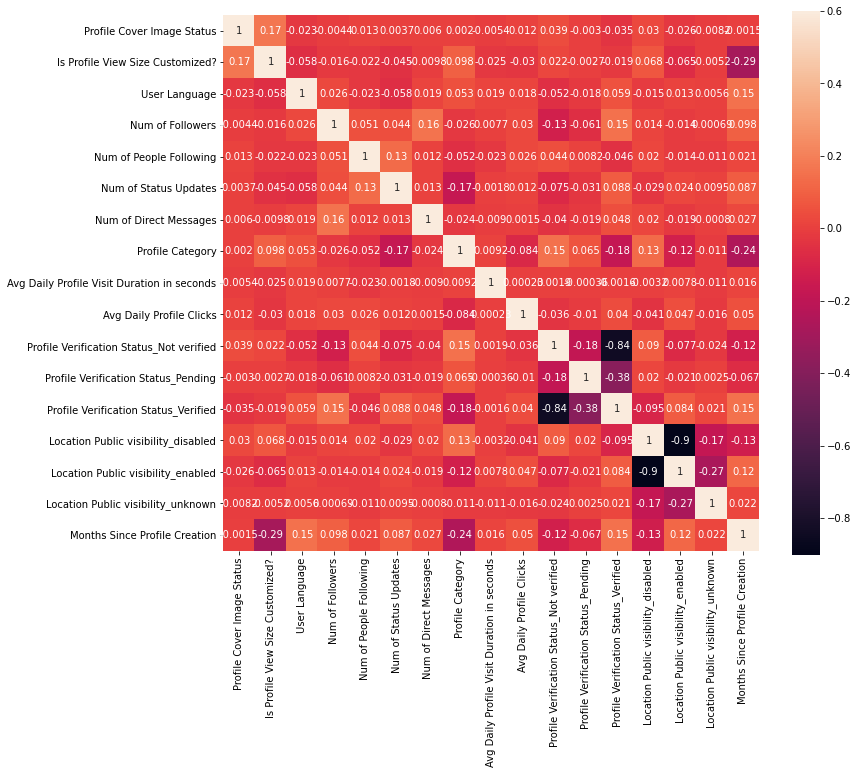

In [119]:
#Plot correlation coefficients
plt.figure(figsize=(12,10))
sns.heatmap(df_train.drop('Num of Profile Likes',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [120]:
#Standardize the variables for regression
df_train[['Num of Followers', 'Num of People Following', 'Num of Status Updates', 'Num of Direct Messages', 'Avg Daily Profile Visit Duration in seconds', 'Avg Daily Profile Clicks','Months Since Profile Creation']]= StandardScaler().fit_transform(df_train[['Num of Followers', 'Num of People Following', 'Num of Status Updates', 'Num of Direct Messages', 'Avg Daily Profile Visit Duration in seconds', 'Avg Daily Profile Clicks','Months Since Profile Creation']])

In [121]:
df_train.head(5)

,Profile Cover Image Status,Is Profile View Size Customized?,User Language,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Num of Profile Likes,Profile Verification Status_Not verified,Profile Verification Status_Pending,Profile Verification Status_Verified,Location Public visibility_disabled,Location Public visibility_enabled,Location Public visibility_unknown,Months Since Profile Creation
0,1,0,0.709467,95763,4289,30809,873,0.2452,14.792,1.5761,2815,0,0,1,0,1,0,277
1,1,0,0.709467,1018746,289,8150,290,0.4800,8.183,11.2782,1242,0,0,1,0,1,0,239
2,1,0,0.709467,13444,1876,4698,227,0.4800,31.823,0.5725,1559,1,0,0,0,1,0,254
3,0,0,0.709467,339168,1148,53216,4035,0.2452,23.052,4.0265,6342,0,0,1,0,1,0,262
4,1,0,0.709467,9215,93,3271,130,0.4800,8.418,3.9229,1078,1,0,0,0,1,0,261


In [122]:
df_train.to_csv("/kaggle/working/preprocessed_train_data.csv", index=False)